## Ананьев Роман

# Лабораторная работа №2
### Компьютерное моделирование выборок непрерывных случайных величин, первичная обработка выборки

`Вариант 2`

In [114]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [120]:
c = 0

for i in "АнаньевРоманВладимирович":
    c+=1 
print(c)

24


 # Задание 1
 <!-- «Запишите» на карточках поочередно буквы,
входящие в написание ваших имени, отчества и фамилии. На оборотной
стороне карточек запишите цифры, руководствуясь следующим прави-
лом: запишите цифру 1, если это карточка с одной из букв А, Б, В, Г, Д,
Е, цифру 2, если карточка с одной из букв Ё, Ж, З, И, Й, К, цифру 3, ес-
ли карточка с одной из букв Л, М, Н, О, П, Р, цифру 4, если карточка с
одной из букв С, Т, У, Ф, Х, Ц, цифру 5, если карточка с одной из букв
Ч, Ш, Щ, Ъ, Ы, Ь, цифру 6, если карточка с одной из букв Э, Ю, Я. Рас-
смотрите эксперимент, состоящий в вытягивании наугад одной из кар-
точек. Пусть случайная величина 𝑋 – цифра, написанная на вытянутой
карточке.
1) Составьте аналитически ряд распределения случайной величины
𝑋, найдите математическое ожидание и дисперсию. Сгенерируйте вы-
борку значений 𝑋 объема 50, составьте и визуализируйте статистиче-
ский ряд. Сопоставьте полученный статистический ряд и с теоретиче-
ским законом распределения случайной величины 𝑋.
2) Проиллюстрируйте теорему Чебышёва для одинаково распреде-
ленных слагаемых. -->

### 1.1

In [161]:
#1.1 
z = np.array([1, 2, 3, 4, 5, 6])
count = np.array([8, 3, 11, 0, 2, 0])
pz = count/np.sum(count)
z_pz = np.stack((z, pz))
mean = 0
for i in range(len(z)):
    mean += z_pz[0][i] * z_pz[1][i]
print(f'Матожидание равно: {mean} ')

Матожидание равно: 2.375 


In [124]:
disp = 0       
for i in range(len(z)):
    disp += ((z_pz[0, i] - mean)**2) * z_pz[1, i] #Подсчет дисперсии
print(f'Дисперсия равна: {disp}')

Дисперсия равна: 1.4010416666666665


In [126]:
sample = np.random.choice(z_pz[0], size = 50, p = z_pz[1])
sample = list(int(i) for i in sample)
print(sample)

[3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 5, 1, 3, 3, 2, 1, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 5, 1, 1, 2, 1, 5, 3, 5]


Text(0.5, 1.0, 'Ряд распределения')

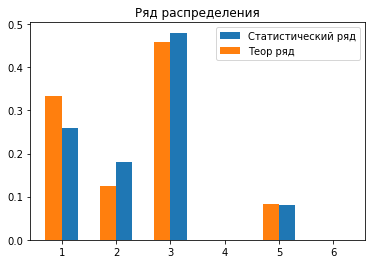

In [203]:
pz_samp  = np.bincount(sample, minlength=7) / 50
pz_samp = pz_samp[1:]     #не рассматриваем ноль
z_samp = np.array([1, 2, 3, 4, 5, 6])
width = 0.3
plt.bar(z_samp+width/2, pz_samp, width, label="Статистический ряд")
plt.bar(z_pz[0]-width/2, z_pz[1], width, label="Теор ряд") 
plt.legend()
plt.title('Ряды распределения')

### 1.2

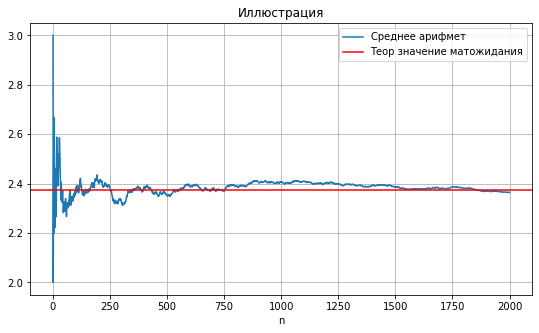

In [187]:
#1.2 Проиллюстрируйте теорему Чебышёва для одинаково распреде- ленных слагаемых.
n = 2000
X = np.random.choice(z_pz[0], size = n, p = z_pz[1])

means = np.cumsum(X)/np.arange(1, n+1)
#subplot    figure
plt.figure(figsize=(9, 5))
plt.plot(np.arange(1, n+1), means, label='Среднее арифмет')
plt.axhline(mean, linestyle='-', color='red', label='Теор значение матожидания')
plt.xlabel('n')
plt.title("Иллюстрация")
plt.grid()
plt.legend()



In [209]:
#2.1 Выполните компьютерное моделирование эксперимента, исходя непосредственно из его описания.

num_exper = 7  # Количество экспериментов
num_dice = 7            # Количество костей

# Моделирование бросков
broski = []
for i in range(num_exper):
    brosok = np.random.randint(1, 7, size=num_dice)
    broski.append(brosok)
    

for i in range(7):
    print(f"Бросок {i+1}: {broski[i]}")


Бросок 1: [6 6 6 3 3 5 1]
Бросок 2: [6 2 2 4 2 1 6]
Бросок 3: [1 1 2 2 2 1 1]
Бросок 4: [2 3 1 1 6 2 1]
Бросок 5: [6 3 3 3 3 5 2]
Бросок 6: [6 1 1 4 2 1 6]
Бросок 7: [4 2 3 2 3 3 6]


Теоретическая вероятность: 0.2701


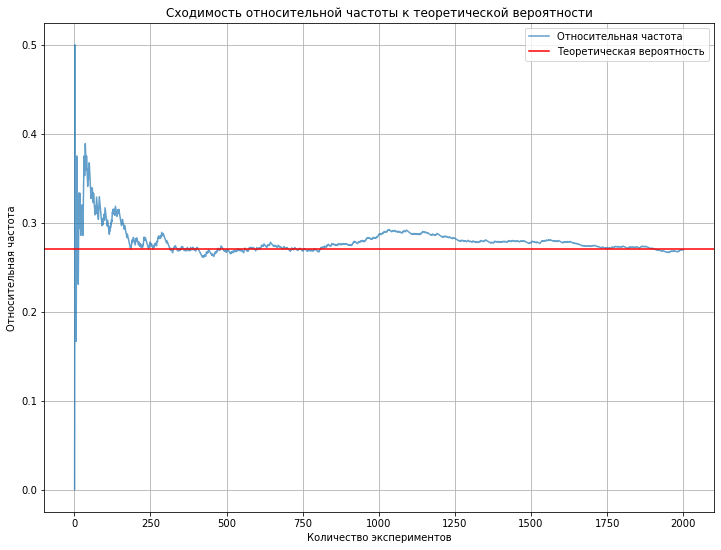

In [259]:
from scipy.special import comb

def is_event_A(outcome):
    counts = np.bincount(outcome, minlength=7)[1:]  # числа от 1 до 6
    if (np.sum(counts == 2) == 2 and 
        np.sum(counts == 1) == 3 and 
        np.sum(counts >= 1) == 5):
        return True
    return False
    
#вычислим вероятность А ананлитически. Мощьность омега равна (6^7). Посчитаем мощьность множества А:
# количество способов быбрать 2 цифры равно (6*5 / 2) = 15, мест куда  можно поставть первую пару:
# равно  (7*6/2), вторую пару: (5*4/2), оставшиеся цифры не должны повторятся: 4*6
p = 15*210*24 / 6**7

num_experiments = 2000  # Увеличиваем количество экспериментов
relative_frequencies = []
event_count = 0


print(f"Теоретическая вероятность: {p:.4f}")

for n in range(1, num_experiments + 1):
    outcome = np.random.randint(1, 7, size=7)
    if is_event_A(outcome):
        event_count += 1
    relative_frequencies.append(event_count / n)

    
plt.figure(figsize=(12, 9))
plt.plot(range(1, num_experiments + 1), relative_frequencies, label='Относительная частота', alpha=0.7)
plt.axhline(y=p, color='red', linestyle='-', label='Теоретическая вероятность')
plt.xlabel('Количество экспериментов')
plt.ylabel('Относительная частота')
plt.title('Сходимость относительной частоты к теоретической вероятности')
plt.legend()
plt.grid()
plt.show()